In [116]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

In [117]:
#Read the data file
telecom = pd.read_csv("train.csv")
telecom.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [118]:
#Check for data dimension
telecom.shape

(69999, 172)

In [119]:
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

Original data file consists of 69999 rows and 172 columns. As per the results there are both numerical and categorical columns

## Handling missing values

In [120]:
#Checking for further missing values per column
null_value_series = telecom.isnull().sum()/len(telecom.index)*100

#Listing columns having more than 5% missing values
null_value_series = null_value_series[null_value_series > 5]
null_value_series

onnet_mou_8                  5.290076
offnet_mou_8                 5.290076
roam_ic_mou_8                5.290076
roam_og_mou_8                5.290076
loc_og_t2t_mou_8             5.290076
loc_og_t2m_mou_8             5.290076
loc_og_t2f_mou_8             5.290076
loc_og_t2c_mou_8             5.290076
loc_og_mou_8                 5.290076
std_og_t2t_mou_8             5.290076
std_og_t2m_mou_8             5.290076
std_og_t2f_mou_8             5.290076
std_og_t2c_mou_8             5.290076
std_og_mou_8                 5.290076
isd_og_mou_8                 5.290076
spl_og_mou_8                 5.290076
og_others_8                  5.290076
loc_ic_t2t_mou_8             5.290076
loc_ic_t2m_mou_8             5.290076
loc_ic_t2f_mou_8             5.290076
loc_ic_mou_8                 5.290076
std_ic_t2t_mou_8             5.290076
std_ic_t2m_mou_8             5.290076
std_ic_t2f_mou_8             5.290076
std_ic_t2o_mou_8             5.290076
std_ic_mou_8                 5.290076
spl_ic_mou_8

#### There are many columns having > 70 % missing values but zero columns are having missing values

### In context of business its important to keep values for rechange columns and hence imputing zero for all rechange columns

In [121]:
recharge_columns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'
                 ]

In [122]:
# impute missing values with 0
telecom[recharge_columns] = telecom[recharge_columns].apply(lambda x: x.fillna(0))

In [123]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(telecom[recharge_columns].isnull().sum()*100/telecom.shape[1])

# summary
print("\n\nSummary statistics\n")
print(telecom[recharge_columns].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       69999.000000       69999.000000       69999.000000   
mean            0.619309           0.683981           0.697867   
std             1.762010           1.943193           1.973434   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       max_rech_data_6  max_rech_data_7  max_rech_data_8  av_rech_amt_data_6  \
count     69999.000000     69999

### Checking for columns having single value across all rows

In [124]:
#Checking for columns having majority of single values for the dataset and percentage of single value in each column
telecom.nunique().sort_values().head(25)

std_ic_t2o_mou_6         1
circle_id                1
loc_og_t2o_mou           1
std_og_t2o_mou           1
loc_ic_t2o_mou           1
last_date_of_month_6     1
last_date_of_month_7     1
last_date_of_month_8     1
std_ic_t2o_mou_8         1
std_og_t2c_mou_8         1
std_og_t2c_mou_7         1
std_og_t2c_mou_6         1
std_ic_t2o_mou_7         1
night_pck_user_6         2
night_pck_user_7         2
night_pck_user_8         2
churn_probability        2
fb_user_7                2
fb_user_8                2
fb_user_6                2
monthly_2g_6             5
monthly_2g_8             6
monthly_2g_7             6
monthly_3g_6            10
monthly_3g_8            12
dtype: int64

#### Many columns are having single values present for all the rows and hence dropping these columns as these columns won't be helpful in determining Chrun probability

In [125]:
#Create Data frame for Features and value counts
telecom_count_df = pd.DataFrame(telecom.nunique().sort_values()).reset_index()
telecom_count_df.columns = ['Features','Value_count']

#Get name of columns having Value_count = 1
single_value_col = telecom_count_df[telecom_count_df['Value_count'] == 1]['Features'].tolist()
single_value_col

['std_ic_t2o_mou_6',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_ic_t2o_mou_8',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_6',
 'std_ic_t2o_mou_7']

In [126]:
print("Shape before dropping single value columns : ", telecom.shape)
#Delete single value columns
telecom = telecom.drop(single_value_col,axis=1)
print("Shape after dropping single value columns : ", telecom.shape)

Shape before dropping single value columns :  (69999, 172)
Shape after dropping single value columns :  (69999, 159)


### Check the distribution of values for columns having 2 unique values

In [127]:
telecom.night_pck_user_6.value_counts(normalize=True)*100


0.0    97.472678
1.0     2.527322
Name: night_pck_user_6, dtype: float64

In [128]:
telecom.night_pck_user_7.value_counts(normalize=True)*100

0.0    97.593059
1.0     2.406941
Name: night_pck_user_7, dtype: float64

In [129]:
telecom.night_pck_user_8.value_counts(normalize=True)*100

0.0    97.898681
1.0     2.101319
Name: night_pck_user_8, dtype: float64

In [130]:
telecom.fb_user_6.value_counts(normalize=True)*100

1.0    91.632514
0.0     8.367486
Name: fb_user_6, dtype: float64

In [131]:
telecom.fb_user_7.value_counts(normalize=True)*100

1.0    90.95438
0.0     9.04562
Name: fb_user_7, dtype: float64

In [132]:
telecom.fb_user_8.value_counts(normalize=True)*100

1.0    89.031873
0.0    10.968127
Name: fb_user_8, dtype: float64

### Dropping columns having more than 93% of single values


In [133]:
print("Shape before dropping 93% single value columns : ", telecom.shape)
telecom = telecom.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8'],axis=1)
print("Shape after dropping 93% single value columns : ", telecom.shape)

Shape before dropping 93% single value columns :  (69999, 159)
Shape after dropping 93% single value columns :  (69999, 156)


### Computing categorical and numeric columns

In [134]:
#Numeric
numeric_col = list(telecom.dtypes[telecom.dtypes != 'object'].index)
print((numeric_col))

['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8

In [135]:
cat_col = list(telecom.dtypes[telecom.dtypes == 'object'].index)
print((cat_col))

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [136]:
#From above data ID column from numeric type and Date columns from categorical types can be dropped
telecom = telecom.drop(cat_col,axis=1)
telecom = telecom.drop(['id'],axis=1)
print("Shape after dropping ID and date columns ", telecom.shape)


Shape after dropping ID and date columns  (69999, 149)


### Drop variables with more than a given threshold of missing values

In [137]:
# Below code gives percentage of null in every column
null_percentage = telecom.isnull().sum()/telecom.shape[0]*100

# Below code gives list of columns having more than 60% null
col_to_drop = null_percentage[null_percentage>70].keys()

intial_cols = telecom.shape[1]
telecom = telecom.drop(col_to_drop, axis=1)

In [138]:
print("Columns dropped due to 70% missing values \n")
print("\n".join(col_to_drop.to_list()))
print("\n{0} columns dropped.".format(intial_cols-telecom.shape[1]))

Columns dropped due to 70% missing values 

count_rech_2g_6
count_rech_2g_7
count_rech_2g_8
count_rech_3g_6
count_rech_3g_7
count_rech_3g_8
arpu_3g_6
arpu_3g_7
arpu_3g_8
arpu_2g_6
arpu_2g_7
arpu_2g_8
fb_user_6
fb_user_7
fb_user_8

15 columns dropped.


### Impute with mice for other missing values

In [139]:
# using MICE technique to impute missing values in the rest of the columns
from fancyimpute import IterativeImputer as MICE
telecom_imputed = MICE().fit_transform(telecom)

In [140]:
# convert imputed numpy array to pandas dataframe
telecom = pd.DataFrame(telecom_imputed, columns=telecom.columns)
print(telecom.isnull().sum()*100/telecom.shape[0])

arpu_6               0.0
arpu_7               0.0
arpu_8               0.0
onnet_mou_6          0.0
onnet_mou_7          0.0
                    ... 
aon                  0.0
aug_vbc_3g           0.0
jul_vbc_3g           0.0
jun_vbc_3g           0.0
churn_probability    0.0
Length: 134, dtype: float64


Data is cleaned with zero missing values

### Derive high value customers
1. From the data set we noticed that if data and recharge value is decreasing in Aug month compared to previous months, such customer are more likely to churn
2. It is important to retain high value customers and determine Churn rate for such high value customer
3. High value customers are calculated based on June and July month recharges

In [141]:
# calculate total data recharge -->> Count of data recharge * Average data recharge
telecom['tot_data_rech_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom['tot_data_rech_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7

In [142]:
#Overall Recharge amount = Total Data recharge + Total Call recharge
telecom['tot_data_call_rech_6'] = telecom['tot_data_rech_6'] + telecom['total_rech_amt_6']
telecom['tot_data_call_rech_7'] = telecom['tot_data_rech_7'] + telecom['total_rech_amt_7']

In [143]:
# calculate average recharge(data + recharge) done by customer in June and July
telecom['av_tot_data_call_6_7'] = (telecom['tot_data_call_rech_6'] + telecom['tot_data_call_rech_7'])/2

In [144]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(telecom.av_tot_data_call_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


In [145]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
telecom_filtered = telecom.loc[telecom.av_tot_data_call_6_7 >= telecom.av_tot_data_call_6_7.quantile(0.7), :]
telecom_filtered = telecom_filtered.reset_index(drop=True)
telecom_filtered.shape

(21013, 139)

In [146]:
#delete variables created to filter high-value customers
telecom_filtered = telecom_filtered.drop(['tot_data_rech_6', 'tot_data_rech_7',
                                      'tot_data_call_rech_6', 'tot_data_call_rech_7', 'av_tot_data_call_6_7'], axis=1)
telecom_filtered.shape

(21013, 134)

We are having 21013 high value customers after filtering based on 70th percentile recharge amount

## Calculate difference between 8th and previous months
The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th

In [147]:
telecom_filtered['arpu_diff'] = telecom_filtered.arpu_8 - ((telecom_filtered.arpu_6 + telecom_filtered.arpu_7)/2)

telecom_filtered['onnet_mou_diff'] = telecom_filtered.onnet_mou_8 - ((telecom_filtered.onnet_mou_6 + telecom_filtered.onnet_mou_7)/2)

telecom_filtered['offnet_mou_diff'] = telecom_filtered.offnet_mou_8 - ((telecom_filtered.offnet_mou_6 + telecom_filtered.offnet_mou_7)/2)

telecom_filtered['roam_ic_mou_diff'] = telecom_filtered.roam_ic_mou_8 - ((telecom_filtered.roam_ic_mou_6 + telecom_filtered.roam_ic_mou_7)/2)

telecom_filtered['roam_og_mou_diff'] = telecom_filtered.roam_og_mou_8 - ((telecom_filtered.roam_og_mou_6 + telecom_filtered.roam_og_mou_7)/2)

telecom_filtered['loc_og_mou_diff'] = telecom_filtered.loc_og_mou_8 - ((telecom_filtered.loc_og_mou_6 + telecom_filtered.loc_og_mou_7)/2)

telecom_filtered['std_og_mou_diff'] = telecom_filtered.std_og_mou_8 - ((telecom_filtered.std_og_mou_6 + telecom_filtered.std_og_mou_7)/2)

telecom_filtered['isd_og_mou_diff'] = telecom_filtered.isd_og_mou_8 - ((telecom_filtered.isd_og_mou_6 + telecom_filtered.isd_og_mou_7)/2)

telecom_filtered['spl_og_mou_diff'] = telecom_filtered.spl_og_mou_8 - ((telecom_filtered.spl_og_mou_6 + telecom_filtered.spl_og_mou_7)/2)

telecom_filtered['total_og_mou_diff'] = telecom_filtered.total_og_mou_8 - ((telecom_filtered.total_og_mou_6 + telecom_filtered.total_og_mou_7)/2)

telecom_filtered['loc_ic_mou_diff'] = telecom_filtered.loc_ic_mou_8 - ((telecom_filtered.loc_ic_mou_6 + telecom_filtered.loc_ic_mou_7)/2)

telecom_filtered['std_ic_mou_diff'] = telecom_filtered.std_ic_mou_8 - ((telecom_filtered.std_ic_mou_6 + telecom_filtered.std_ic_mou_7)/2)

telecom_filtered['isd_ic_mou_diff'] = telecom_filtered.isd_ic_mou_8 - ((telecom_filtered.isd_ic_mou_6 + telecom_filtered.isd_ic_mou_7)/2)

telecom_filtered['spl_ic_mou_diff'] = telecom_filtered.spl_ic_mou_8 - ((telecom_filtered.spl_ic_mou_6 + telecom_filtered.spl_ic_mou_7)/2)

telecom_filtered['total_ic_mou_diff'] = telecom_filtered.total_ic_mou_8 - ((telecom_filtered.total_ic_mou_6 + telecom_filtered.total_ic_mou_7)/2)

telecom_filtered['total_rech_num_diff'] = telecom_filtered.total_rech_num_8 - ((telecom_filtered.total_rech_num_6 + telecom_filtered.total_rech_num_7)/2)

telecom_filtered['total_rech_amt_diff'] = telecom_filtered.total_rech_amt_8 - ((telecom_filtered.total_rech_amt_6 + telecom_filtered.total_rech_amt_7)/2)

telecom_filtered['max_rech_amt_diff'] = telecom_filtered.max_rech_amt_8 - ((telecom_filtered.max_rech_amt_6 + telecom_filtered.max_rech_amt_7)/2)

telecom_filtered['total_rech_data_diff'] = telecom_filtered.total_rech_data_8 - ((telecom_filtered.total_rech_data_6 + telecom_filtered.total_rech_data_7)/2)

telecom_filtered['max_rech_data_diff'] = telecom_filtered.max_rech_data_8 - ((telecom_filtered.max_rech_data_6 + telecom_filtered.max_rech_data_7)/2)

telecom_filtered['av_rech_amt_dataaa_diff'] = telecom_filtered.av_rech_amt_data_8 - ((telecom_filtered.av_rech_amt_data_6 + telecom_filtered.av_rech_amt_data_7)/2)

telecom_filtered['vol_2g_mb_diff'] = telecom_filtered.vol_2g_mb_8 - ((telecom_filtered.vol_2g_mb_6 + telecom_filtered.vol_2g_mb_7)/2)

telecom_filtered['vol_3g_mb_diff'] = telecom_filtered.vol_3g_mb_8 - ((telecom_filtered.vol_3g_mb_6 + telecom_filtered.vol_3g_mb_7)/2)

## Data vis

Text(0.5, 1.0, 'Churn Distribution')

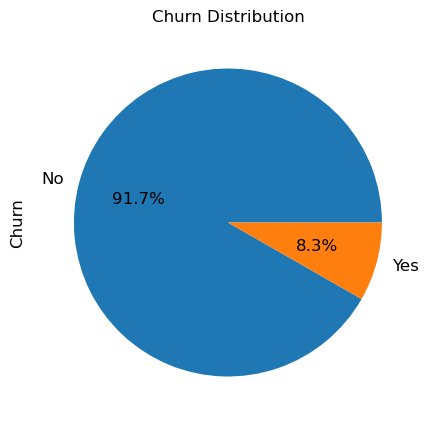

In [148]:
#Churn Distribution
churn_dist = (telecom_filtered['churn_probability'].value_counts()*100.0 /len(telecom_filtered)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

churn_dist.set_ylabel('Churn',fontsize = 12)
churn_dist.set_title('Churn Distribution', fontsize = 12)

The data is skewed and majority of the customers i.e., **91.6% DO NOT Churn**


In [149]:
# function to create Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

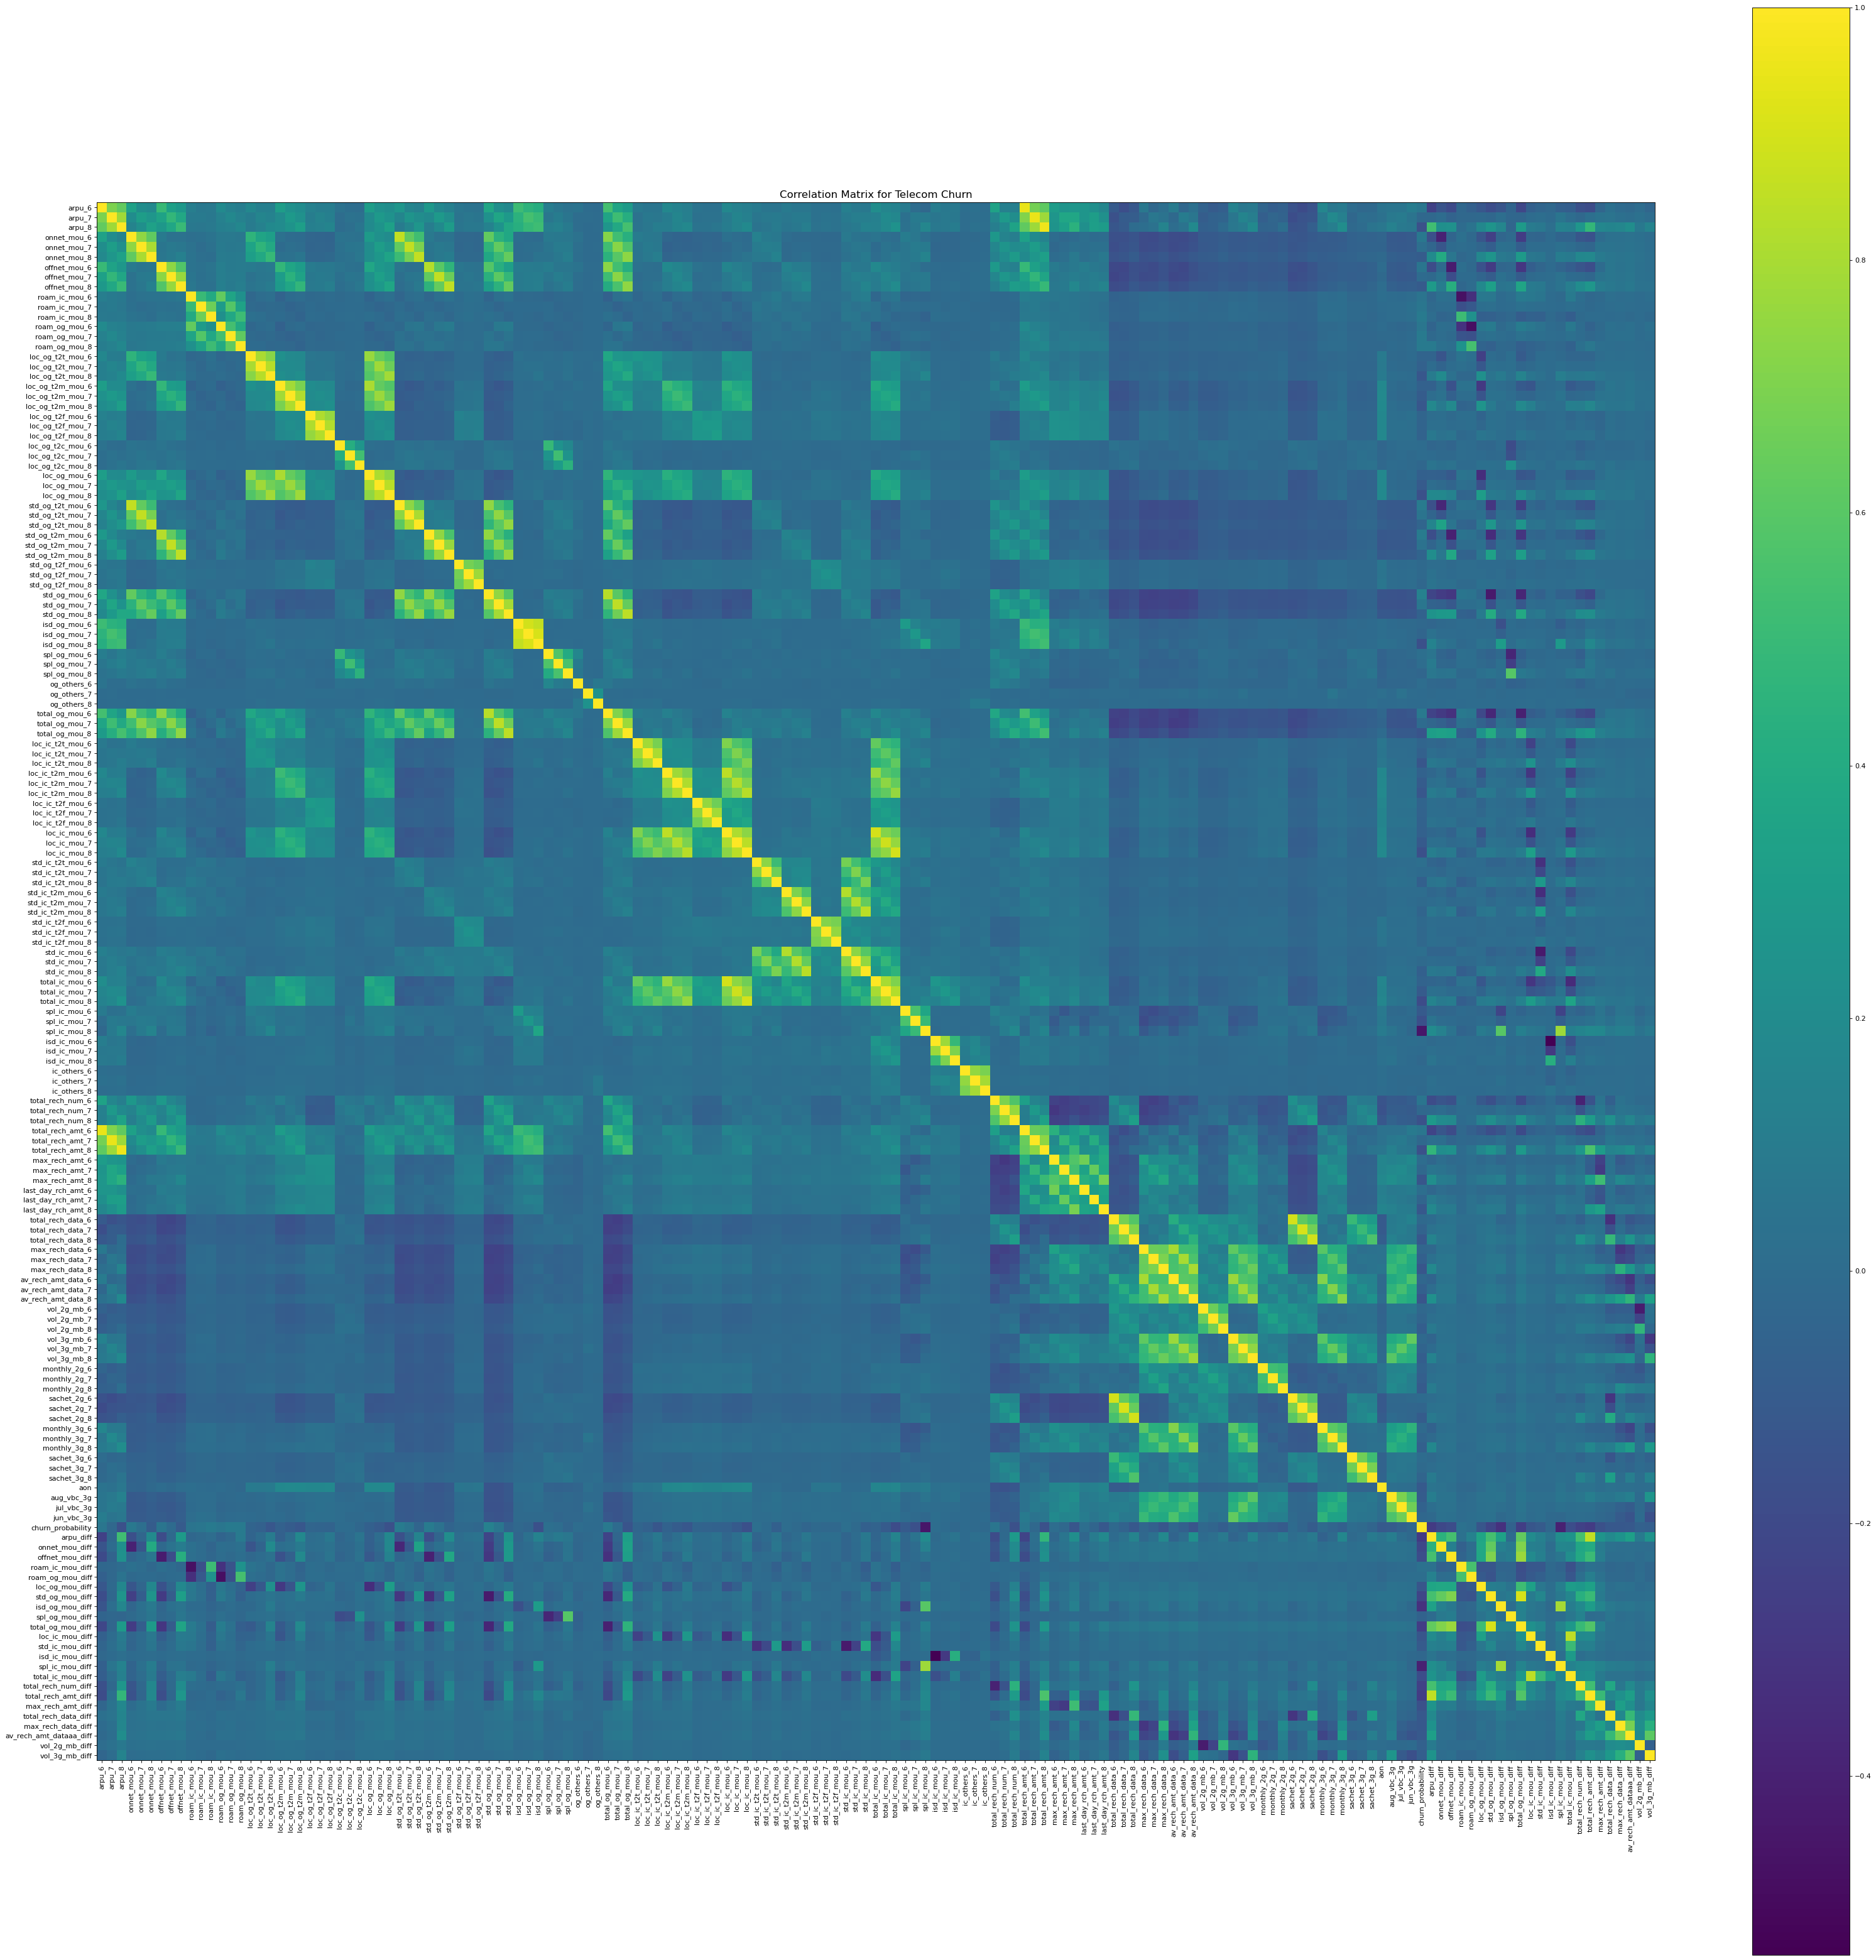

In [150]:
# Heatmap of high value customer
plotCorrelationMatrix(telecom_filtered, 50)

In [151]:
# function to plot scatter plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

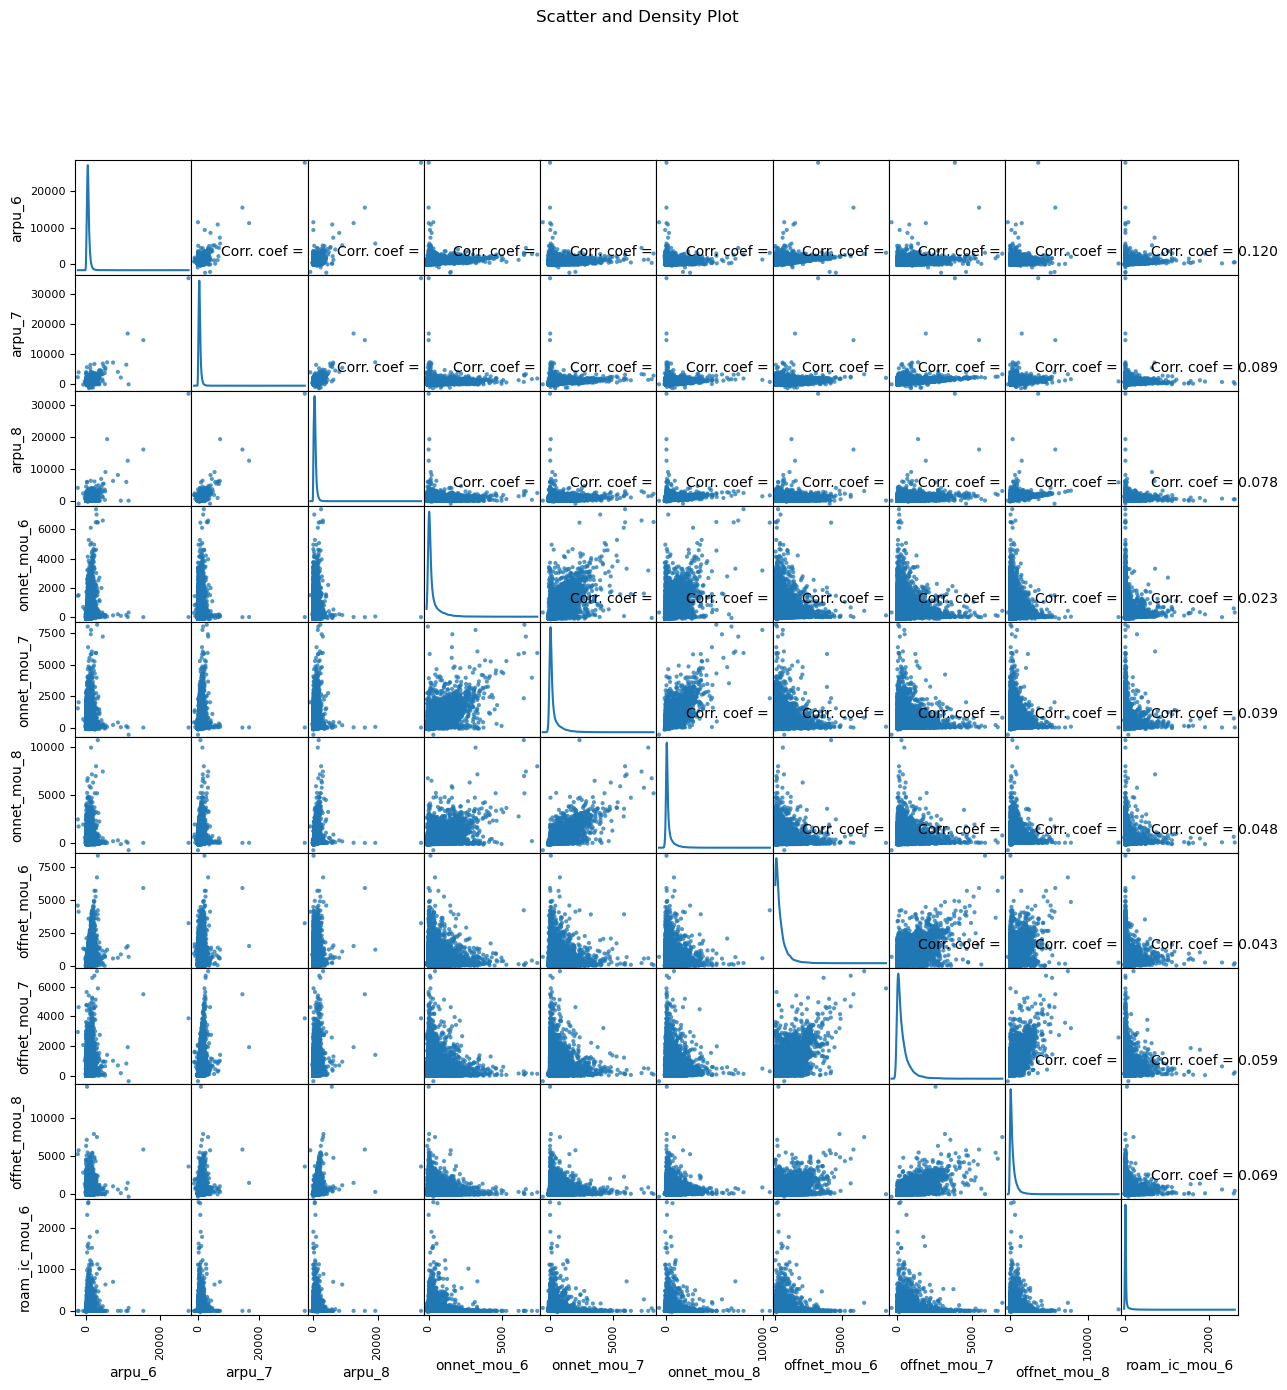

In [152]:
plotScatterMatrix(telecom_filtered, 15, 10)

Text(0.5, 1.0, 'Tenure Graph')

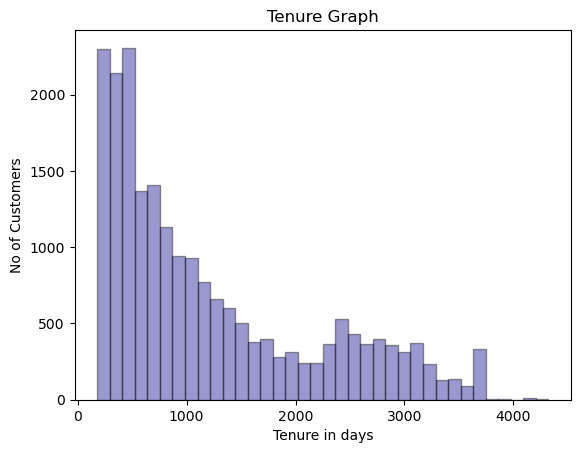

In [153]:
# Check the tenure of the customers
cust_tenure = sns.distplot(telecom_filtered['aon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
cust_tenure.set_ylabel('No of Customers')
cust_tenure.set_xlabel('Tenure in days')
cust_tenure.set_title('Tenure Graph')

In [154]:
import seaborn as sns
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")

count    21013.000000
mean       558.458938
std        474.147345
min      -2258.709000
25%        307.718000
50%        482.616000
75%        700.552000
max      27731.088000
Name: arpu_6, dtype: float64


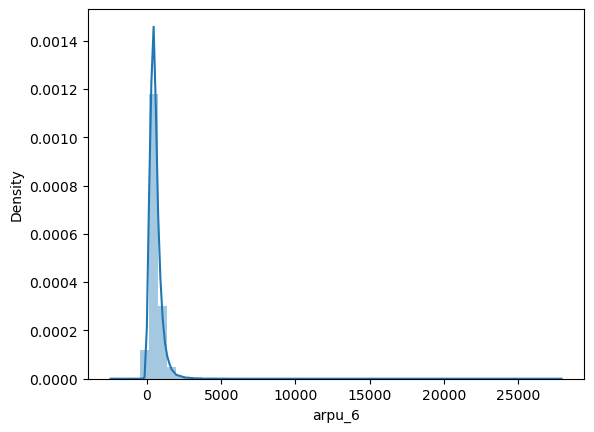

In [155]:
univariate(telecom_filtered.arpu_6)

count    21013.000000
mean       -68.437759
std        502.233995
min      -7213.410000
25%       -169.295000
50%        -13.985000
75%         68.485000
max      12768.705000
Name: total_og_mou_diff, dtype: float64


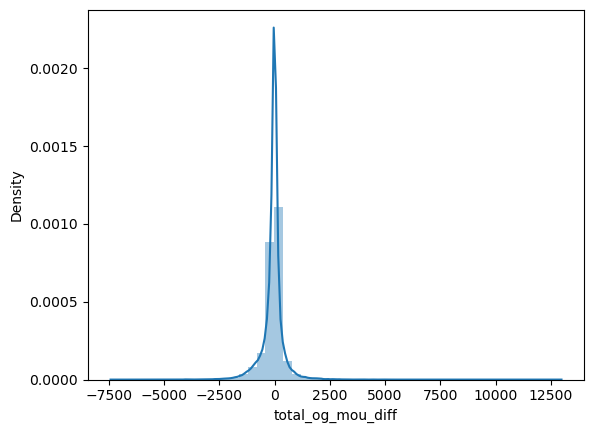

In [156]:
univariate(telecom_filtered.total_og_mou_diff)

count    21013.000000
mean       229.781000
std        467.514087
min       -767.062766
25%         10.290000
50%         65.340000
75%        238.040000
max      10752.560000
Name: onnet_mou_8, dtype: float64


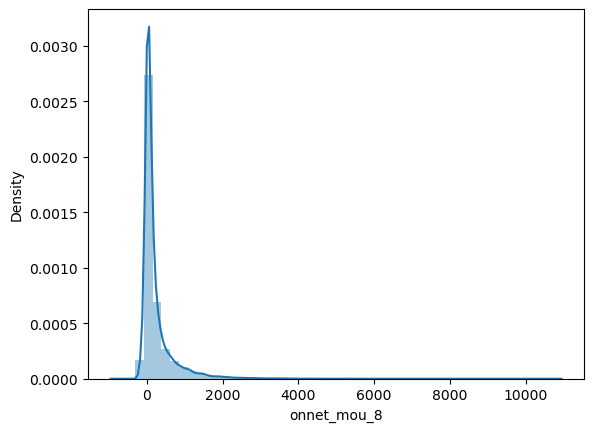

In [157]:
univariate(telecom_filtered.onnet_mou_8)

count    21013.000000
mean       -76.978394
std        418.972501
min      -6950.000000
25%       -245.000000
50%        -57.000000
75%         99.000000
max      14344.500000
Name: total_rech_amt_diff, dtype: float64


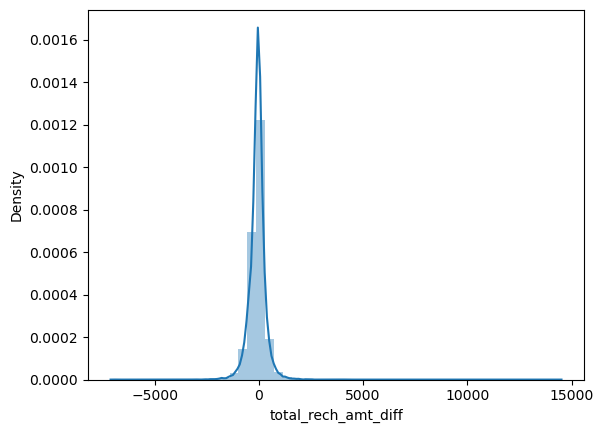

In [158]:
univariate(telecom_filtered.total_rech_amt_diff)

<AxesSubplot:xlabel='churn_probability', ylabel='aon'>

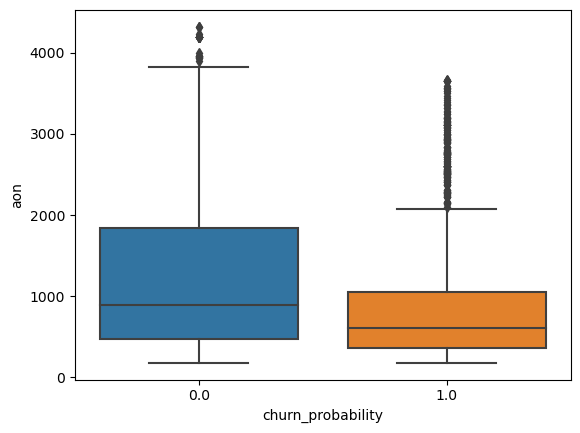

In [159]:
# Box-plot to check tenured customers v/s churn probability
sns.boxplot(x = telecom_filtered.churn_probability, y = telecom_filtered.aon)

Tenured customers do no churn and they keep availing telecom services

In [161]:
# Box-plot to check avg. recharge amount v/s churn probability
sns.boxplot(x = telecom_filtered.churn_probability, y = telecom_filtered.av_rech_amt_data_diff)

AttributeError: 'DataFrame' object has no attribute 'av_rech_amt_data_diff'

In [162]:
telecom_filtered['aon']

0         647.0
1         602.0
2         455.0
3        1219.0
4         573.0
          ...  
21008     283.0
21009     251.0
21010    1507.0
21011     221.0
21012     277.0
Name: aon, Length: 21013, dtype: float64

In [163]:
# Binning of months 
tn_range = [100, 365, 730, 1200, 1500]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs']
telecom_filtered['tenure_range'] = pd.cut(telecom_filtered['aon'], tn_range, labels=tn_label)
telecom_filtered['tenure_range'].head()

0    6-12 Months
1    6-12 Months
2    6-12 Months
3        2-5 Yrs
4    6-12 Months
Name: tenure_range, dtype: category
Categories (4, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs']

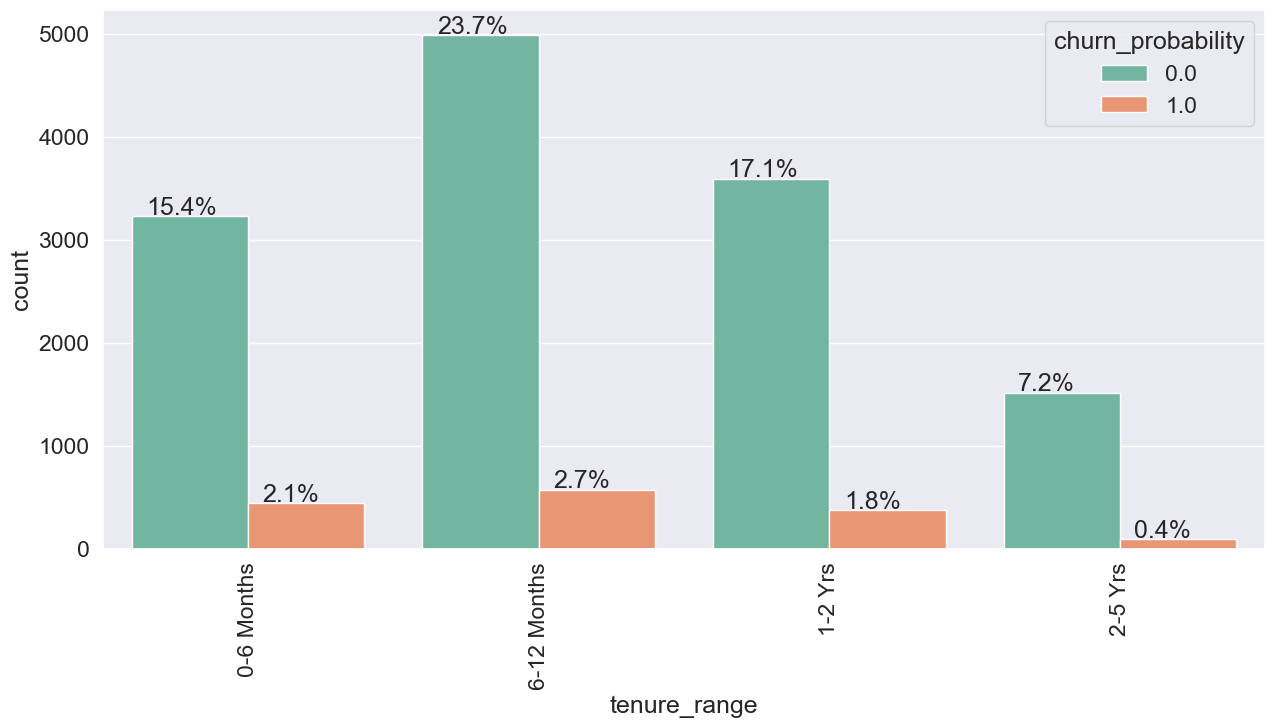

In [164]:
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

temp = pd.Series(data = 'tenure_range')
fig, ax = plt.subplots()
width = len(telecom_filtered['tenure_range'].unique()) + 6 + 4*len(temp.unique())
fig.set_size_inches(width , 7)

total = float(len(telecom_filtered.index))
ax = sns.countplot(x="tenure_range", data=telecom_filtered, palette="Set2", hue = "churn_probability");
for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(telecom_filtered))), (p.get_x()+0.05, p.get_height()+20))
plt.xticks(rotation=90)
plt.show()

### By looking at data , information is spread across 3 months - June,July and August. Hence creating new DF for months

In [25]:
def df_info(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

In [26]:
#June month
june_columns = []
for column in telecom.columns:
    x = re.search("6$", column)
    if x:
        june_columns.append(column)
# missing_values.loc[sixth_month_columns].sort_values(by='Null_Percentage', ascending=False)
june_info = df_info(telecom)
condition = june_info.index.isin(june_columns)
june_columns = june_info[condition]
june_columns

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_mou_6,float64,67231,2768,3.95,21837
loc_ic_t2m_mou_6,float64,67231,2768,3.95,19034
loc_ic_mou_6,float64,67231,2768,3.95,24442
isd_og_mou_6,float64,67231,2768,3.95,1103
std_ic_t2f_mou_6,float64,67231,2768,3.95,2624
og_others_6,float64,67231,2768,3.95,914
std_ic_t2m_mou_6,float64,67231,2768,3.95,7931
std_ic_t2t_mou_6,float64,67231,2768,3.95,5323
spl_og_mou_6,float64,67231,2768,3.95,3503
loc_og_mou_6,float64,67231,2768,3.95,22309


In [27]:
#July month
july_columns = []
for column in telecom.columns:
    x = re.search("7$", column)
    if x:
        july_columns.append(column)
# missing_values.loc[sixth_month_columns].sort_values(by='Null_Percentage', ascending=False)
july_info = df_info(telecom)
condition = june_info.index.isin(july_columns)
july_columns = july_info[condition]
july_columns

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_mou_7,float64,67312,2687,3.84,24258
std_ic_t2t_mou_7,float64,67312,2687,3.84,5479
std_ic_t2m_mou_7,float64,67312,2687,3.84,8033
std_ic_t2f_mou_7,float64,67312,2687,3.84,2695
spl_ic_mou_7,float64,67312,2687,3.84,103
isd_ic_mou_7,float64,67312,2687,3.84,4640
ic_others_7,float64,67312,2687,3.84,1658
std_ic_mou_7,float64,67312,2687,3.84,10112
spl_og_mou_7,float64,67312,2687,3.84,3827
loc_ic_t2f_mou_7,float64,67312,2687,3.84,6287


In [28]:
#August month
aug_columns = []
for column in telecom.columns:
    x = re.search("8$", column)
    if x:
        aug_columns.append(column)
# missing_values.loc[sixth_month_columns].sort_values(by='Null_Percentage', ascending=False)
aug_info = df_info(telecom)
condition = aug_info.index.isin(aug_columns)
aug_columns = july_info[condition]
aug_columns

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2m_mou_8,float64,66296,3703,5.29,15968
loc_og_mou_8,float64,66296,3703,5.29,21950
loc_ic_mou_8,float64,66296,3703,5.29,24182
loc_og_t2c_mou_8,float64,66296,3703,5.29,2204
std_og_mou_8,float64,66296,3703,5.29,21745
loc_og_t2f_mou_8,float64,66296,3703,5.29,3311
loc_ic_t2f_mou_8,float64,66296,3703,5.29,6092
isd_og_mou_8,float64,66296,3703,5.29,1008
loc_og_t2m_mou_8,float64,66296,3703,5.29,17616
spl_ic_mou_8,float64,66296,3703,5.29,95


In [171]:
new_telecom_df = telecom_filtered[:].copy()
new_telecom_df.shape

(21041, 161)

In [172]:
X = new_telecom_df.drop(['churn_probability'], axis=1)
y = new_telecom_df['churn_probability']

new_telecom_df.drop('churn_probability', axis=1, inplace=True)

In [173]:
new_telecom_df.shape

(21041, 160)

In [174]:
X.drop('tenure_range', axis=1, inplace=True)

In [175]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [176]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [177]:
# Split in train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [178]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data : ", y_train_imb)
print("Imbalance in Test Data : ", y_test_imb)

X_train Shape :  (14728, 159)
X_test Shape :  (6313, 159)
Imbalance in Train Data :  0.09169075680083018
Imbalance in Test Data :  0.09145919778699861


In [181]:
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))

Before upsampling count of label 0 13491
Before upsampling count of label 1 1237


In [182]:
#Upsampling - Applying Smote to balance the data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(26982, 159)
(26982,)


In [183]:
print("y_tr Shape", y_tr.shape)

imb = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data : ",imb)

y_tr Shape (26982,)
Imbalance in Train Data :  1.0


In [184]:
print('After upsampling count of label 0 {}'.format(sum(y_tr==0)))
print('After upsampling count of label 1 {}'.format(sum(y_tr==1)))

After upsampling count of label 0 13491
After upsampling count of label 1 13491


### PCA

In [186]:
from sklearn.decomposition import PCA

In [187]:
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

PCA(random_state=100)

In [188]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(26982, 159)
(6313, 159)


In [189]:
pca.explained_variance_ratio_

array([1.07824314e-01, 9.02025069e-02, 6.39437203e-02, 5.24667987e-02,
       4.20702168e-02, 3.98313145e-02, 3.67409989e-02, 3.30373832e-02,
       3.20865205e-02, 2.73539222e-02, 2.37231793e-02, 2.33653560e-02,
       1.98892292e-02, 1.71344722e-02, 1.66356090e-02, 1.58560301e-02,
       1.56315244e-02, 1.35053433e-02, 1.32165632e-02, 1.20249740e-02,
       1.18014336e-02, 1.12268552e-02, 1.08891103e-02, 1.07698528e-02,
       9.89487042e-03, 9.64791935e-03, 9.21483904e-03, 9.03771719e-03,
       8.74566896e-03, 8.42099587e-03, 8.13345348e-03, 7.84143234e-03,
       7.74247434e-03, 7.47910252e-03, 7.46932159e-03, 7.22544647e-03,
       6.62972916e-03, 6.40054750e-03, 5.98710829e-03, 5.70961808e-03,
       5.63146804e-03, 5.56004098e-03, 5.35490978e-03, 5.23542951e-03,
       4.91629965e-03, 4.77618645e-03, 4.62124198e-03, 4.47639510e-03,
       4.08249644e-03, 3.85931824e-03, 3.77365613e-03, 3.55529471e-03,
       3.50245655e-03, 3.29121958e-03, 3.22711819e-03, 2.89419056e-03,
      

In [190]:
import matplotlib.pyplot as plt

<BarContainer object of 159 artists>

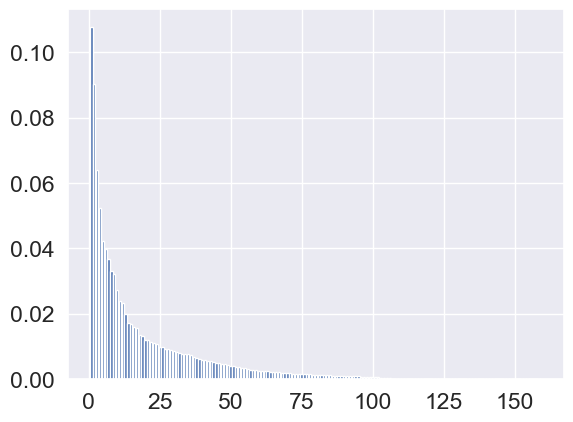

In [192]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

#### Making the scree plot

In [195]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

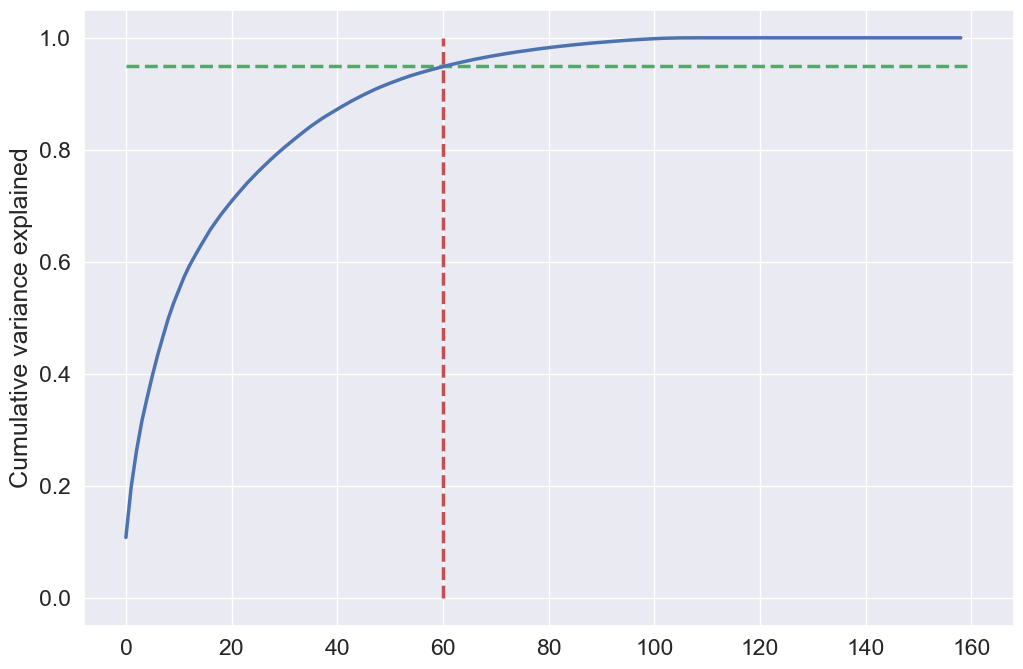

In [209]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=160, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with **60 components**

#### Making it a little more unsupervised 

In [219]:
pca_again = PCA(0.90)

In [220]:
df_train_pca2 = pca_again.fit_transform(X_tr)

In [221]:
df_train_pca2.shape

(26982, 47)

In [222]:
corrmat = np.corrcoef(df_train_pca2.transpose())

In [223]:
corrmat.shape

(47, 47)

<AxesSubplot: >

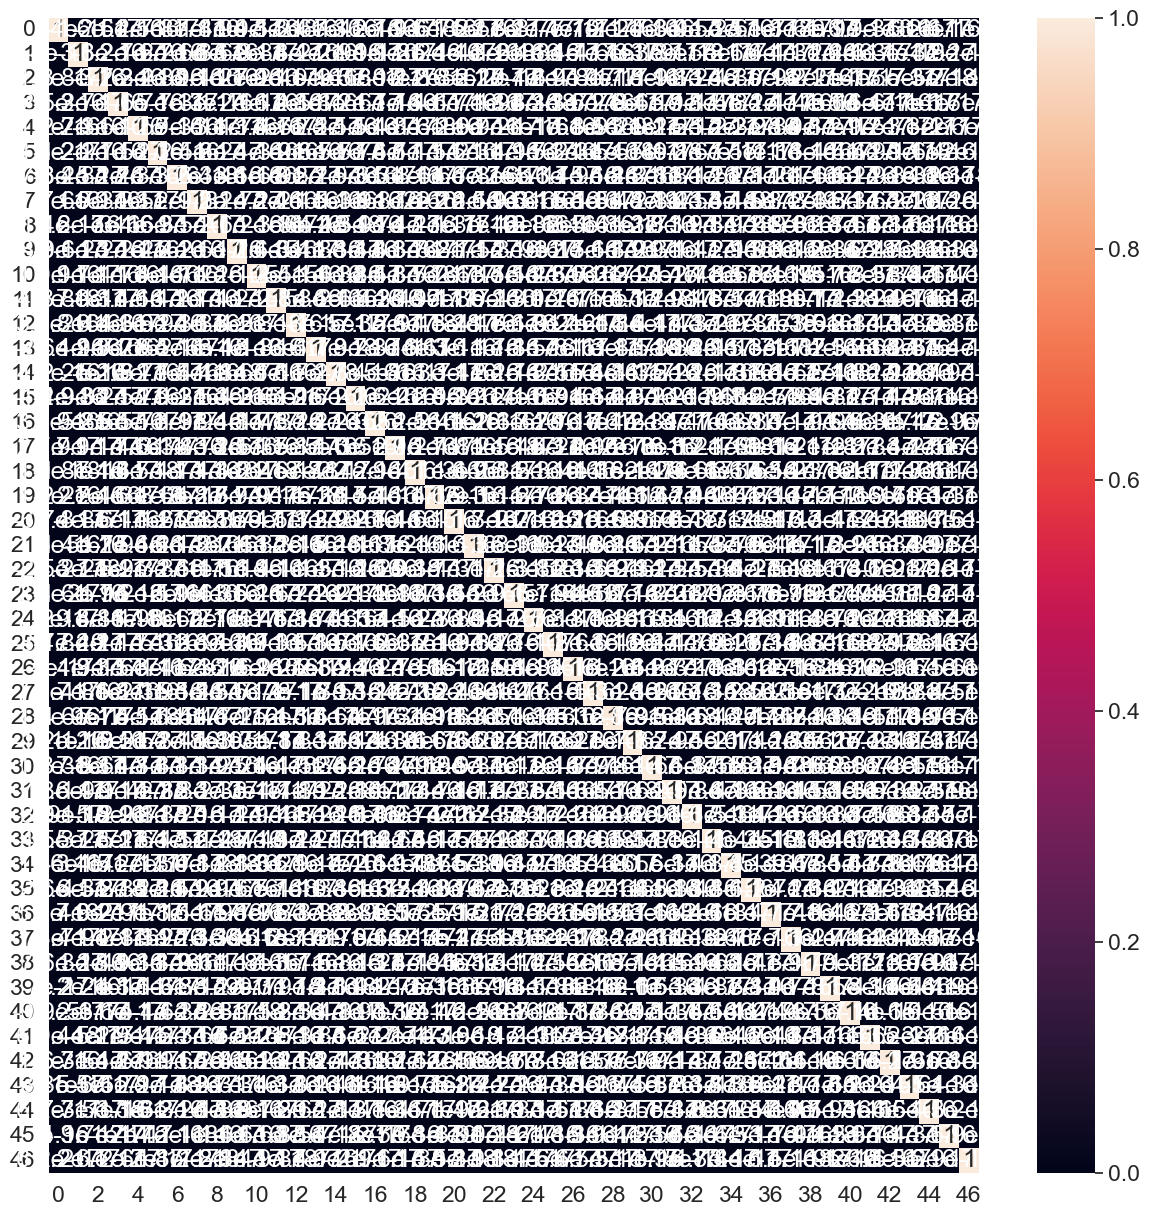

In [224]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)